<KeysViewHDF5 ['stats']>


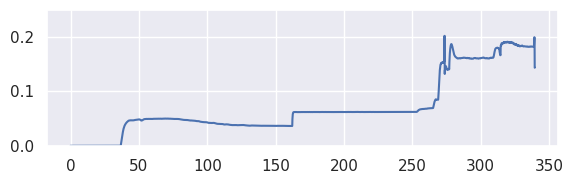

In [14]:
import h5py
import numpy as np
import os
from readable_number import ReadableNumber
import matplotlib.pyplot as plt
import seaborn as sns
rn = ReadableNumber
sns.set_theme()

plt.rcParams['figure.figsize'] = (6,2);

fig, ax = plt.subplots();

experiment = "capacity_sensitivity"
config = "1280MBLLC"
path = f"experiments_copy_presentation/{experiment}/{config}/bc_data/zsim.h5"

f = h5py.File(path, 'r')

print(f.keys())

dset = f["stats"]["root"]

num_private_sets = np.sum(dset['l3']['profNonReclaimableLines'], 1)
num_private_sets = np.divide(num_private_sets, 2097152);
phase = 10000/1000000; # x is in millions
x_vals = np.arange(0, num_private_sets.size*phase, phase);

ax.plot(x_vals, num_private_sets);

fig.tight_layout();

#ax.set_ylabel("Fraction of Occupied Reclaimable Cache Lines");
#ax.set_xlabel("Cycles (millions)");
plt.ylim(0,.25);

<KeysViewHDF5 ['stats']>


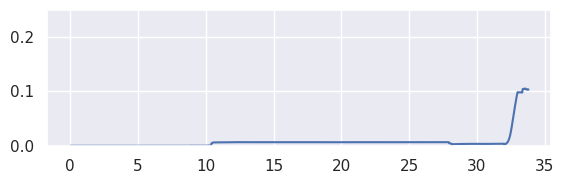

In [15]:
fig, ax = plt.subplots();

experiment = "capacity_sensitivity"
config = "1280MBLLC"
path = f"experiments_copy_presentation/{experiment}/{config}/bfs_data/zsim.h5"

f = h5py.File(path, 'r')

print(f.keys())

dset = f["stats"]["root"]

num_private_sets = np.sum(dset['l3']['profNonReclaimableLines'], 1)
num_private_sets = np.divide(num_private_sets, 2097152);
phase = 10000/1000000; # x is in millions
x_vals = np.arange(0, num_private_sets.size*phase, phase);

ax.plot(x_vals, num_private_sets);

fig.tight_layout();

#ax.set_ylabel("Fraction of Occupied Reclaimable Cache Lines");
#ax.set_xlabel("Cycles (millions)");
plt.ylim(0,.25);

<KeysViewHDF5 ['stats']>


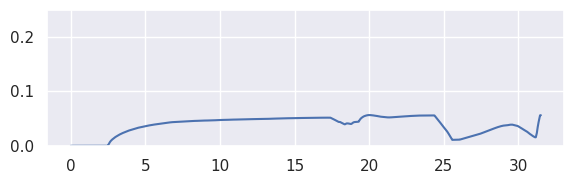

In [16]:
fig, ax = plt.subplots();

experiment = "capacity_sensitivity"
config = "1280MBLLC"
path = f"experiments_copy_presentation/{experiment}/{config}/cc_data/zsim.h5"

f = h5py.File(path, 'r')

print(f.keys())

dset = f["stats"]["root"]

num_private_sets = np.sum(dset['l3']['profNonReclaimableLines'], 1)
num_private_sets = np.divide(num_private_sets, 2097152);
phase = 10000/1000000; # x is in millions
x_vals = np.arange(0, num_private_sets.size*phase, phase);

ax.plot(x_vals, num_private_sets);

fig.tight_layout();

#ax.set_ylabel("Fraction of Occupied Reclaimable Cache Lines");
#ax.set_xlabel("Cycles (millions)");
plt.ylim(0,.25);

<KeysViewHDF5 ['stats']>


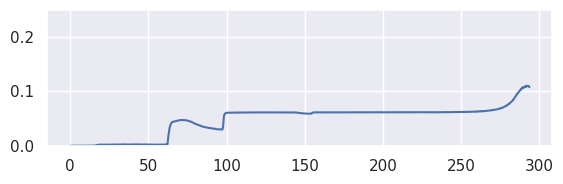

In [18]:
fig, ax = plt.subplots();

experiment = "capacity_sensitivity"
config = "1280MBLLC"
path = f"experiments_copy_presentation/{experiment}/{config}/sssp_data/zsim.h5"

f = h5py.File(path, 'r')

print(f.keys())

dset = f["stats"]["root"]

num_private_sets = np.sum(dset['l3']['profNonReclaimableLines'], 1)
num_private_sets = np.divide(num_private_sets, 2097152);
phase = 10000/1000000; # x is in millions
x_vals = np.arange(0, num_private_sets.size*phase, phase);

ax.plot(x_vals[0:29378], num_private_sets);

fig.tight_layout();

#ax.set_ylabel("Fraction of Occupied Reclaimable Cache Lines");
#ax.set_xlabel("Cycles (millions)");
plt.ylim(0,.25);